In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from botnet_detection import summary_of_detection, rf_train, test_dict, get_specific_features_from, dl_train, dl_test_dict
from summarizer import Summarizer
import matplotlib.pyplot as plt
from plot_features import plot_confusion_matrix
attacks = ['ddos', 'spam', 'irc']
files = ['minute_aggregated/{}_background-0.1s.featureset.csv'.format(attack) for attack in attacks]

Using TensorFlow backend.


## Deep Learning With Normalized Features

for deep learning
minute_aggregated/ddos_background_new-0.1s.featureset.csv


/home/david/projects/research/lambda-code/ddos-detection/botnet_detection.py:64: RuntimeWarning: invalid value encountered in double_scalars
  return (x - mean) / std


Accuracy: 0.4965, Recall: 0.0000, Precision: 0.0000, f1_score: 0.0000 



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


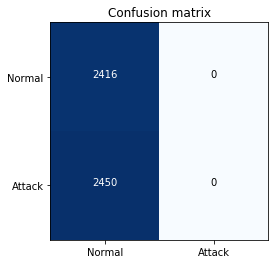

minute_aggregated/spam_background-0.1s.featureset.csv
Accuracy: 0.8670, Recall: 0.8188, Precision: 0.9439, f1_score: 0.8769 



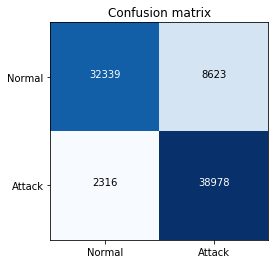

minute_aggregated/irc_background-0.1s.featureset.csv
Accuracy: 0.8383, Recall: 0.7942, Precision: 0.9148, f1_score: 0.8502 



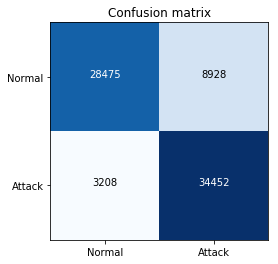

ddos 0.4965 - 0.0000 - 0.0000 - 0.0000
spam 0.8670 - 0.9439 - 0.8188 - 0.8769
irc 0.8383 - 0.9148 - 0.7942 - 0.8502


In [3]:
print('for deep learning')
other_files = ['minute_aggregated/ddos_background_new-0.1s.featureset.csv'] + files[1:]
scores = []
for f in other_files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=True,
                                                              norm_and_standardize=True)
    clf = dl_train(xtrain, ytrain, use_big_model=True, use_class_weight=False)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    scores.append('{accuracy:.4f} - {precision:.4f} - {recall:.4f} - {f1_score:.4f}'.format(**results))
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])
    plt.show()

    
for i, score in enumerate(scores):
    print(attacks[i], score)

## Random Forest Initial Results

minute_aggregated/ddos_background-0.1s.featureset.csv
Accuracy: 0.9905, Recall: 0.9576, Precision: 0.6564, f1_score: 0.7789 



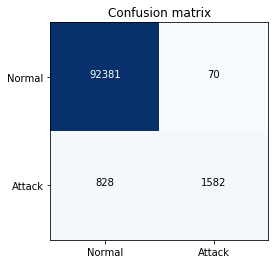

minute_aggregated/spam_background-0.1s.featureset.csv
Accuracy: 0.9598, Recall: 0.7900, Precision: 0.4921, f1_score: 0.6064 



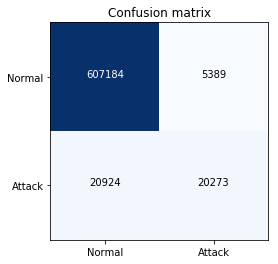

minute_aggregated/irc_background-0.1s.featureset.csv
Accuracy: 0.9584, Recall: 0.7884, Precision: 0.3704, f1_score: 0.5040 



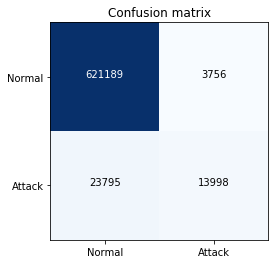

ddos 0.9905 - 0.6564 - 0.9576 - 0.7789
spam 0.9598 - 0.4921 - 0.7900 - 0.6064
irc 0.9584 - 0.3704 - 0.7884 - 0.5040


In [5]:
# Detecting Attacks

scores = []

for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=False)
    clf = rf_train(xtrain, ytrain, trees=10)
    results = test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    scores.append('{accuracy:.4f} - {precision:.4f} - {recall:.4f} - {f1_score:.4f}'.format(**results))
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])
    plt.show()

for i, score in enumerate(scores):
    print(attacks[i], score)

## Deep Learning initial results

for deep learning
minute_aggregated/spam_background-0.1s.featureset.csv


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.9370, Recall: 0.0000, Precision: 0.0000, f1_score: 0.0000 



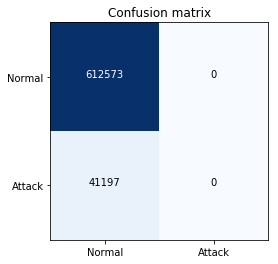

minute_aggregated/ddos_background-0.1s.featureset.csv
Accuracy: 0.9746, Recall: 0.0000, Precision: 0.0000, f1_score: 0.0000 



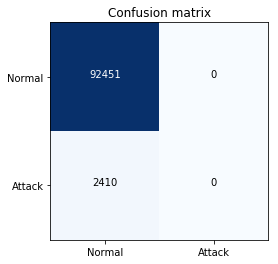

minute_aggregated/irc_background-0.1s.featureset.csv
Accuracy: 0.9430, Recall: 0.0000, Precision: 0.0000, f1_score: 0.0000 



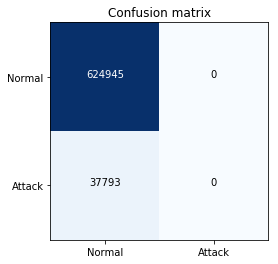

spam 0.9370 - 0.0000 - 0.0000 - 0.0000
ddos 0.9746 - 0.0000 - 0.0000 - 0.0000
irc 0.9430 - 0.0000 - 0.0000 - 0.0000


In [10]:
print('for deep learning')
scores = []
for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=False)
    clf = dl_train(xtrain, ytrain, use_big_model=False, use_class_weight=False)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    scores.append('{accuracy:.4f} - {precision:.4f} - {recall:.4f} - {f1_score:.4f}'.format(**results))
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])
    plt.show()

for i, score in enumerate(scores):
    print(attacks[i], score)

## Deep Learning on background with sampling and class weights.

for deep learning
minute_aggregated/all_background-0.1s.featureset.csv
Accuracy: 0.6116, Recall: 0.5636, Precision: 0.9853, f1_score: 0.7171 



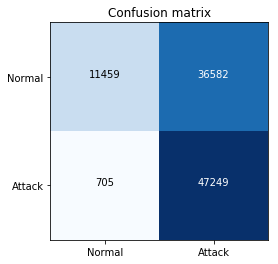

minute_aggregated/spam_background-0.1s.featureset.csv
Accuracy: 0.6660, Recall: 0.6041, Precision: 0.9711, f1_score: 0.7448 



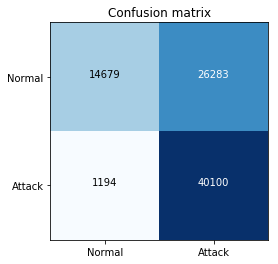

minute_aggregated/ddos_background-0.1s.featureset.csv
Accuracy: 0.7497, Recall: 0.6867, Precision: 0.9249, f1_score: 0.7882 



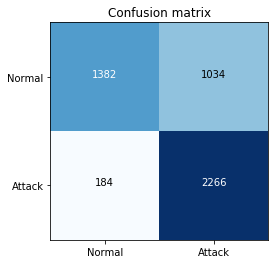

minute_aggregated/irc_background-0.1s.featureset.csv
Accuracy: 0.7893, Recall: 0.7397, Precision: 0.8949, f1_score: 0.8100 



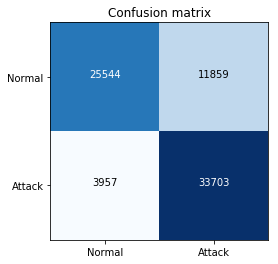

In [11]:
print('for deep learning')
for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=True)
    clf = dl_train(xtrain, ytrain, use_big_model=True, use_class_weight=True)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])
    plt.show()